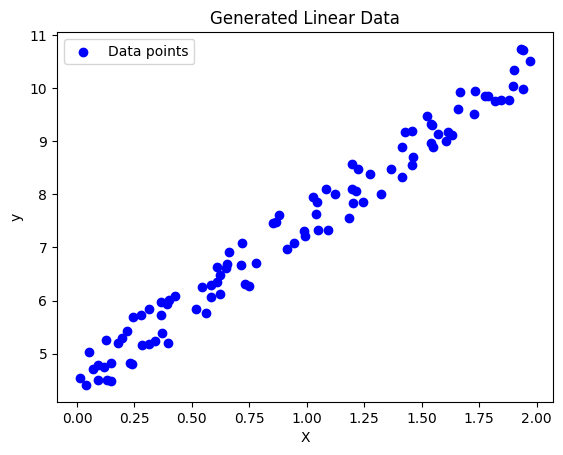

In [1]:
#note that english is my second language
#Linear Regression

#exampel rendom generated linear dataset
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num = 100 #number of instances
X = 2*np.random.rand(num,1) #column vector
y = 4 + 3 * X + np.random.rand(num , 1)

plt.scatter(X, y, color="blue", label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Linear Data")
plt.legend()
plt.show()


In [2]:
#now we calculate the normal equation to found θ^
#θ^ = (XTX)-1*XT*y
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
teta_best = np.linalg.inv(X_b.T @ X_b)@X_b.T @ y
# the operator @ used to multiply the matrixes
teta_best


array([[4.51359766],
       [2.98323418]])

In [3]:
#We would have hoped for θ = 4 and θ = 3 instead of θ = 4.215 and θ = 2.770
#becuse the noise made it impossible to recover the exact parameters of the original function
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ teta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

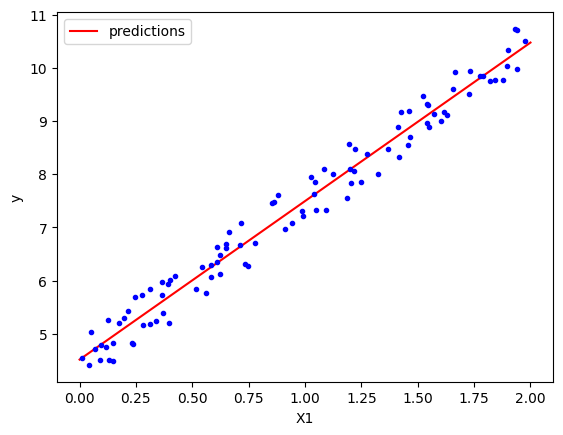

In [4]:

plt.plot(X_new , y_predict , "r-" , label = "predictions")
plt.plot(X , y , "b.")
plt.xlabel('X1')
plt.ylabel("y")
plt.legend()
plt.show()

In [5]:
#linear regression in Sckit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_ , lin_reg.coef_)
lin_reg.predict(X_new)

[4.51359766] [[2.98323418]]


array([[ 4.51359766],
       [10.48006601]])

In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [7]:
#we can use np.linalg.pinv() to compute the pseudinverse directly
np.linalg.pinv(X_b)@y

array([[4.51359766],
       [2.98323418]])

In [8]:
#in below,we show a different method for linear regression modulization
#which is particullary efficient in memory management

In [9]:
#to enhance the accracy of our model which most predict the MSE function minimum parameters 
#approximatly we use an algorithm that starts from the MSE function and tries to approach the corresponding parameters
# sufficiently , the Descentive gradian will be used as following :
#first the gradiant will be intuitivly generated until the gradiant vector :
#  
# ∇θ​MSE(θ)​=2/m * ​XT(Xθ−y)
#
#now we multiply η (learning rate)  in our gradian vector to move backward from it and approach the minimum parameters as desired
#
#θ(next step)=θ-η∇θ MSE(θ)
#

eta = 0.1 #learning rate
n_apochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.rand(2,1)

for epoch in range(n_apochs):
    gradiants = 2 / m *X_b.T @(X_b @ theta-y)
    theta = theta - eta * gradiants
theta
#To find a good learning rate, you can use grid search 

array([[4.51359766],
       [2.98323418]])

In [10]:
#The main problem with batch gradient descent is the fact that it uses the
#whole training set to compute the gradients at every step, which makes it very
#slow when the training set is large

In [11]:
# we have in mind another decentive gradiant which is stochastic :
# instaed of trainig the whole data and decreasing gently step by step 
# the SGD algorithm will pick a random instance of the data and bounce up and down on the MSE function and repeat this procces until it
# reechs approximatly to the minimum parameter
# the good news is this algorithm is much faster then the Batch Gradient Descent due to its SGD nature which is random picking 
# the bad news is this algorithm will have a hard time reaching the minimum parameter precisly becuse is random 
# therfore the SGD is much faster then the BGD but its not as accurate 
# below is a simple example of the SGD :

In [12]:
#Stochastic Gradient Descen
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)


np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.51548062],
       [2.9775157 ]])

In [13]:
#using SGD in sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000 , tol=1e-5 , penalty=None , eta0=0.01 , n_iter_no_change=100 , random_state=42)
sgd_reg.fit(X , y.ravel())
 # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [14]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

In [15]:
#Polynomial Regression
#instead of picking the whole dataset or a random set of data;
#the gradients will pick data according to a small random set of data which is known as the term "Minibatch"
#the point is we can benefit from hardware matrix optimization operaion and operators;
#Also;in our parameters data sets,we will experinece much less noise and unpredictabality
#Therefore,we use Polynomial Regression

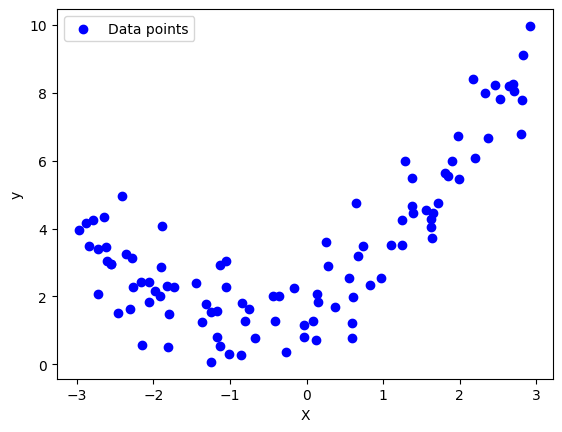

In [16]:

#example

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m , 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m , 1)

plt.scatter(X , y ,color = "blue" , label = "Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly , y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

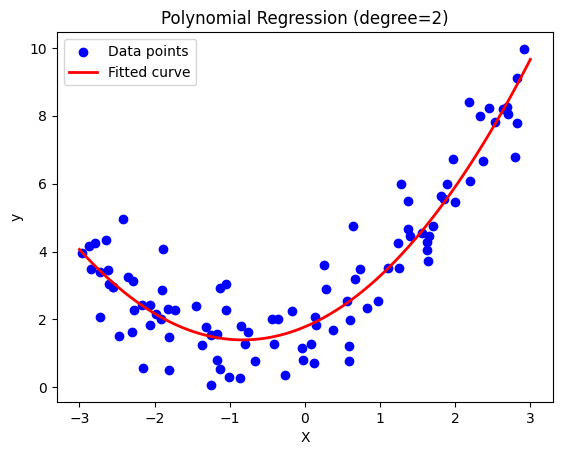

In [19]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_new, y_new, color="red", linewidth=2, label="Fitted curve")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression (degree=2)")
plt.show()

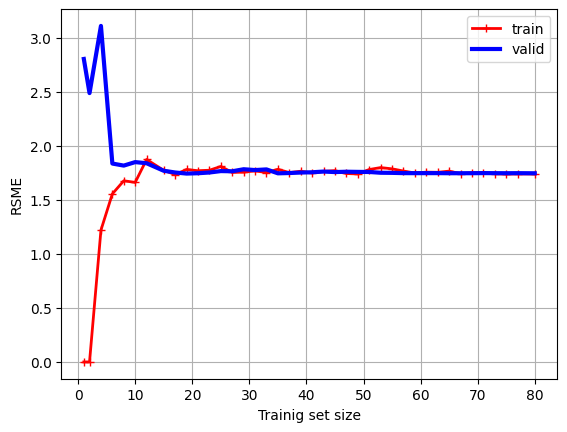

In [20]:
#learning curve
#These learning curves are typical of a model that’s underfitting.
from sklearn.model_selection import learning_curve

train_size , train_scores , valid_scores = learning_curve(
    LinearRegression(), X ,y , train_sizes=np.linspace(0.01 , 1.0 , 40) , cv = 5,
    scoring="neg_root_mean_squared_error")
train_error = -train_scores.mean(axis=1)
valid_error = -valid_scores.mean(axis=1)

plt.plot(train_size , train_error , "r-+" , linewidth = 2 , label = "train")
plt.plot(train_size , valid_error , "b-" , linewidth = 3 , label = "valid")
plt.xlabel("Trainig set size")
plt.ylabel("RSME")
plt.legend()
plt.grid(True)
plt.show()

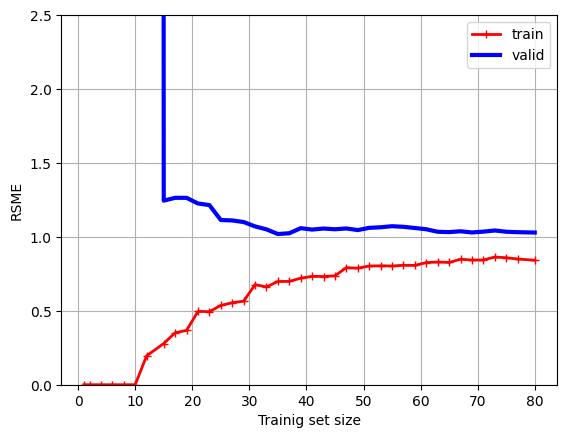

In [21]:
#learning curve of a 10th-degree polynormal model on the same data
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)


plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.ylim(0,2.5)
plt.xlabel("Trainig set size")
plt.ylabel("RSME")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1 , solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [ ]:
# using stochastic gradiant descent
sgd_reg = SGDRegressor(penalty="l2",alpha=0.1/m , tol = None,
                       max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

In [ ]:
# lasso regression 
# using a regularization function which
#
# J(θ)=MSE(θ)+2α∑i=1nθi
# g(θ,J)=∇θMSE(θ)+2αsign(θ1)sign(θ2)⋮sign(θn) where sign(θi)=-1if θi<00if θi=0+1if θi
#

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [ ]:
# Elastic Net Regression
# is a middle of ground between ridge regression and lasso
# the regularization term is weghted sum of bouth ridge and lasso , and you can control the mix ratio r
# when r = 0 ,elastic net equizalent to ridge , and when r = 1 it is equivalent to lassso
#
# J(θ)=MSE(θ)+(r/2)α∑(i=1 to n)|θi| + (1-r)αm∑(i=1 to n)θi^2
#
# example
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1 , l1_ratio=0.5)#l1_ratio corresponds to the mix ratio r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.78114505])

In [1]:
# Early stopping 
# is to stop trainig as soon the validation errror reaches a minimum
# Here is a basic implementation of early stopping
# This code adds polynomial features and scales inputs for both training and validation sets.
# It trains an SGDRegressor using incremental learning via partial_fit().
# At each epoch, it tracks the validation RMSE and saves the best model using deepcopy().
# Unlike early stopping, training doesn't stop, but we can revert to the best model afterward.

# from copy import deepcopy
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# X_train , y_train , X_valid ,y_valid = [...]#split the quadratic dataset

# preprocessing = make_pipeline(PolynomialFeatures(degree=90 , include_bias=False),StandardScaler())
# X_train_perp = preprocessing.fit_transform(X_train)
# X_valid_perp = preprocessing.transform(X_valid)
# sgd_reg = SGDRegressor(penalty=None , eta0=0.002 , random_state=42)
# n_epochs = 500
# best_valid_rmse = float('inf')

# for epoch in range(n_epochs):
#     sgd_reg.partial_fit(X_train_perp , y_train)
#     y_valid_predict = sgd_reg.predict(X_valid_perp)
#     val_error = mean_squared_error(y_valid , y_valid_predict , squared=False)
#     if val_error < best_valid_rmse:
#         best_valid_rmse = val_error
#         best_model = deepcopy(sgd_reg)

In [28]:
# logistic regression
# it like linear regretion but the output is the estimated the probelity 
# 
# p^ = h θ ( x ) = σ ( θ ⊺ x )
# σ ( t ) = 1 / (1+exp(-t))
# y ^ = 0 if p^ < 0.5 and 1 if p^ ≥ 0.5
# 
# Note that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a logistic
# regression model using the default threshold of 50% probability predicts 1 if
# θ x is positive and 0 if it is negative.
# cost functoin
#
# c(θ)=-log(p^)if y=1 and -log(1-p^)if y=0
# 
# The cost function over the whole training set is the average cost over all training instances
# 
#  J(θ) = -(1/m) * Σ(i = 1 to m) [y(i) * log(p̂(i)) + (1 - y(i)) * log(1 - p̂(i))]
#

In [29]:
#build a classifier to detect the Iris virginica type based only on the
#petal width feature
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [31]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train , X_test , y_train , y_tset = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train , y_train)

LogisticRegression(random_state=42)

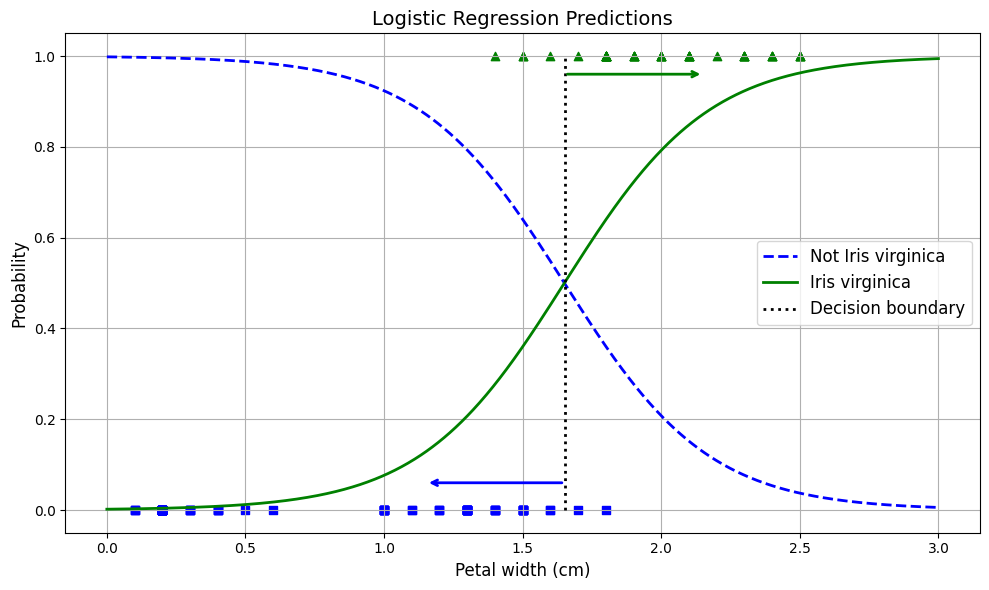

In [75]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)#reshape to get column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]


plt.figure(figsize=(10, 6))  # width=10, height=6 inches
# Plot probabilities
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
# Plot decision boundary
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
# Improve plot styling
plt.grid(True)
plt.legend(fontsize=12)
plt.xlabel("Petal width (cm)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Logistic Regression Predictions", fontsize=14)
plt.ylim(-0.05, 1.05)  # keep the y-axis tightly bounded between 0 and 1
plt.tight_layout()

plt.scatter(X_train[y_train == 1], [1] * sum(y_train == 1), marker="^", c="g", label="Iris virginica (train)")
plt.scatter(X_train[y_train == 0], [0] * sum(y_train == 0), marker="s", c="b", label="Other (train)")


# اضافه کردن فلش‌ها از مرز تصمیم به دو منحنی احتمال
plt.annotate('', xy=(decision_boundary + 0.5 , 0.96), xytext=(decision_boundary, 0.96),
             arrowprops=dict(arrowstyle="->", color="green", lw=2))
plt.annotate('', xy=(decision_boundary - 0.5, 0.06), xytext=(decision_boundary, 0.06),
             arrowprops=dict(arrowstyle="->", color="blue", lw=2))

# Show plot
plt.show()

In [76]:
decision_boundary

np.float64(1.6516516516516517)

In [81]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

In [90]:
# Softmax Regression
# The logistic regression model generalized to support multiple 
# classes when given an instance x, the softmax regression model
# first computes a score s (x) for each class k, then estimates the probability of
# each class by applying the softmax function to the scores
# 
# s k ( x ) = (θ (k) ) ⊺ x
# p ^ k = σ s(x) k = exps k (x) ∑ j=1 K exps j (x)
# k is number of class
# s(x) is a vectior containing the scores if each class for the instance x
# σ(s(x)) is the estimated probability that the instance x belongs to class k,given the scores of each class for that instance
# 
# y ^ = argmax k σ s(x) k = argmax k s k ( x ) = argmax k (θ (k) ) ⊺ x
# argmax it returns the value of k that maximizes the estimated probability σ(s(x)) .
#  
# cross Entropy
# 
# J(Θ)=(-1/m)∑(i=1 to m)∑(k=1 to K)yk(i)log(p^k(i))
# 
# LogisticRegression classifier uses softmax regression automaticly when you train it on more then two classes
X = iris.data[["petal length (cm)" , "petal width (cm)"]].values
y = iris['target']
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42)

softmax_reg = LogisticRegression(C=30 , random_state=42)
softmax_reg.fit(X_train , y_train)
softmax_reg.predict([[5,2]])

array([2])

In [88]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])